In [1]:
import numpy as np 
import math
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import csv
import math
from matplotlib.patches import Rectangle

In [2]:
constellations=["starlink","kuiper","oneweb","iridium"]
policy="P_OPT"

In [3]:
# gs_type = "single"
label = "distributed"
single_upbound=[2000,10000,20000,30000]
result={}
name_s=['a','b','c','d']
path="data/"

In [4]:
def zero_out_mean(data):
    tmp=[]
    for item in data:
        if item !=0:
            tmp.append(item)
    if tmp:
        return np.mean(tmp)  
    else:
        return 0
def zero_out_min(data):
    tmp=[]
    for item in data:
        if item!=0:
            tmp.append(item)
    if tmp:
        return np.min(tmp)
    else:
        return float('inf')
def zero_out_max(data):
    tmp=[]
    for item in data:
        if item!=0:
            tmp.append(item)
    if tmp:
        return np.max(tmp)
    else:
        return 0

## load signaling migration overhead

In [5]:

result_mobility_signaling={}
result_session_signaling={}
for constellation in constellations:
    print(constellation)
    path="data/"
    if constellation=="starlink":
        path+="starlink_72_22/"
    elif constellation=="kuiper":
        path+="kuiper/"
    elif constellation=="oneweb":
        path+="OneWeb-1week/"
    elif constellation=="iridium":
        path+="Iridium_1week/"
    result1={}
    result2={}
    for num in single_upbound:
        tmp_mobility=[]
        tmp_pdu_session=[]
        for i in range(4):
            s_index=i
            tmp_mobility.append(np.array(np.load(path+"opt_handover/satellite/"+label+"scenario_"+name_s[s_index]+"_"+str(num)+"_mobility.npy")))
            tmp_pdu_session.append(np.array(np.load(path+"opt_handover/satellite/"+label+"scenario_"+name_s[s_index]+"_"+str(num)+"_session.npy")))
#         print(np.shape(tmp_mobility))
        result1[num]=tmp_mobility
        result2[num]=tmp_pdu_session
    constellations_mobility_signaling={}
    constellations_session_signaling={}
    for num in single_upbound:
        tmp1=result1[num]
        tmp2=result2[num]
        print(np.shape(tmp1))
        scenario_mobility_signaling=[]
        scenario_session_signaling=[]
        # mobility
        for scenario in tmp1:
            tmp_signaling=[]
            for mins in scenario:
                signaling_mins=[x[0]for x in mins]
                tmp_signaling.append(signaling_mins)
            per_sat_signaling=[[r[col]/60 for r in tmp_signaling] for col in range(len(tmp_signaling[0]))] 
            t_signaling=[np.mean(sat) for sat in per_sat_signaling]
            scenario_mobility_signaling.append(t_signaling)
        constellations_mobility_signaling[num]=scenario_mobility_signaling
        #session
        for scenario in tmp2:
            tmp_signaling=[]
            for mins in scenario:
                signaling_mins=[x[0]for x in mins]
                tmp_signaling.append(signaling_mins)
            per_sat_signaling=[[r[col]/60 for r in tmp_signaling] for col in range(len(tmp_signaling[0]))]
            t_signaling=[zero_out_mean(sat) for sat in per_sat_signaling]
            scenario_session_signaling.append(t_signaling)
        constellations_session_signaling[num]=scenario_session_signaling
    result_mobility_signaling[constellation]=constellations_mobility_signaling
    result_session_signaling[constellation]=constellations_session_signaling
    print(np.shape(constellations_session_signaling[10000]))

starlink
(4, 99, 1584, 2)
(4, 99, 1584, 2)
(4, 99, 1584, 2)
(4, 99, 1584, 2)
(4, 1584)
kuiper
(4, 99, 1156, 2)
(4, 99, 1156, 2)
(4, 99, 1156, 2)
(4, 99, 1156, 2)
(4, 1156)
oneweb
(4, 99, 720, 2)
(4, 99, 720, 2)
(4, 99, 720, 2)
(4, 99, 720, 2)
(4, 720)
iridium
(4, 99, 66, 2)
(4, 99, 66, 2)
(4, 99, 66, 2)
(4, 99, 66, 2)
(4, 66)


In [6]:
# the total overhead = overhead due to mobility+ overhead due to session
sat_all={}
for constellation in constellations:
    tmp_sat={}
    for num in single_upbound:
        tt_sat=[]
        for s in range(len(result_mobility_signaling[constellation][num])):
            tt_sat.append([result_mobility_signaling[constellation][num][s][i] + result_session_signaling[constellation][num][s][i]for i in range(len(result_mobility_signaling[constellation][num][s]))])
        print(np.shape(tt_sat))
        tmp_sat[num]=tt_sat
    sat_all[constellation]=tmp_sat

(4, 1584)
(4, 1584)
(4, 1584)
(4, 1584)
(4, 1156)
(4, 1156)
(4, 1156)
(4, 1156)
(4, 720)
(4, 720)
(4, 720)
(4, 720)
(4, 66)
(4, 66)
(4, 66)
(4, 66)


## load gsl signaling migration overhead

In [7]:
gsl_mobility_signaling=np.load("data/gsl_mobility_signaling.npy",allow_pickle=True)
gsl_session_signaling=np.load("data/gsl_session_signaling.npy",allow_pickle=True)

## plot

starlink
starlink[662.2595802535475, 1324.519160507095, 1324.519160507095, 0]
starlink[3320.018757112856, 6640.037514225712, 6640.037514225712, 0]
starlink[6641.752646211082, 13283.505292422164, 13283.505292422164, 0]
starlink[9963.5316983911, 19927.0633967822, 19927.0633967822, 0]
kuiper
kuiper[570.6935816698673, 1141.3871633397346, 1141.3871633397346, 0]
kuiper[2863.8704296833607, 5727.740859366721, 5727.740859366721, 0]
kuiper[5729.878342639433, 11459.756685278866, 11459.756685278866, 0]
kuiper[8595.98735083904, 17191.97470167808, 17191.97470167808, 0]
oneweb
oneweb[346.59404019878014, 693.1880803975603, 693.1880803975603, 0]
oneweb[1744.647371991067, 3489.294743982134, 3489.294743982134, 0]
oneweb[3491.8488563173, 6983.6977126346, 6983.6977126346, 0]
oneweb[5239.107615497171, 10478.215230994341, 10478.215230994341, 0]
iridium
iridium[27.006080478625407, 54.01216095725081, 54.01216095725081, 0]
iridium[138.70707945537373, 277.41415891074746, 277.41415891074746, 0]
iridium[278.409754

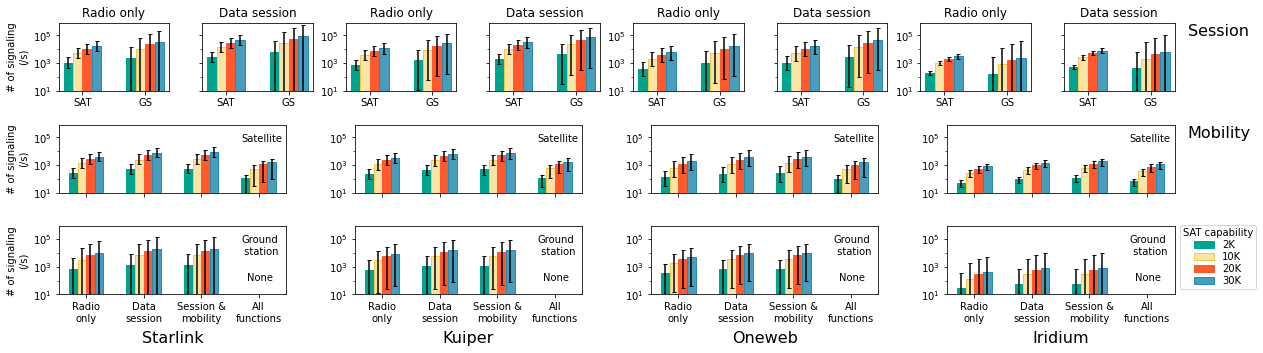

In [9]:
color=["#00A491","#FAE4A5","#FF592D","#489DBC"]
edgecolor=["#00A491","#F6C845","#FF592D","#278BB0"]
user_label=["2K","10K","20K","30K"]
title=["Starlink","Kuiper","Oneweb","Iridium"]
width=1.5
offset=[-3*width/2,-width/2,width/2,3*width/2]
location=[10,20,30,40]
fig, _ = plt.subplots(3,8,sharex=True,figsize=(20,5))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.5)
#plot background box
# rect1 = Rectangle((0.105, 0.110), 0.865, 0.5, facecolor='#EEEEEE', edgecolor='grey',
#                  transform=fig.transFigure, zorder=0)
# fig.patches.append(rect1)
    
# rect2 = Rectangle((0.105, 0.68), 0.865, 0.21, facecolor='#EEEEEE', edgecolor='grey',
#                  transform=fig.transFigure, zorder=0)
# fig.patches.append(rect2)
for c in range(len(constellations)):
    constellation=constellations[c]
    print(constellation)
    constellations_session=result_session_signaling[constellation]
    constellations_mobility=result_mobility_signaling[constellation]
    session_sat_mean={}
    session_sat_y={}
    mobility_sat_mean={}
    mobility_sat_y={}
    for num in single_upbound:
        session_sat_mean[num]=[zero_out_mean(scenario) for scenario in constellations_session[num]]
        session_max=[zero_out_max(scenario) for scenario in constellations_session[num]]
        session_min=[zero_out_min(scenario) for scenario in constellations_session[num]]
        session_sat_y[num]=[]
        y1=[]
        y2=[]
        for i in range(len(constellations_session[num])):
            y1.append(session_sat_mean[num][i]-session_min[i])
            y2.append(session_max[i]-session_sat_mean[num][i])
        session_sat_y[num].append(y1)
        session_sat_y[num].append(y2)
        
        mobility_sat_mean[num]=[zero_out_mean(scenario) for scenario in constellations_mobility[num]]
        mobility_max=[zero_out_max(scenario) for scenario in constellations_mobility[num]]
        mobility_min=[zero_out_min(scenario) for scenario in constellations_mobility[num]]
        mobility_sat_y[num]=[]
        y1=[]
        y2=[]
        for i in range(len(constellations_mobility[num])): 
            y1.append(mobility_sat_mean[num][i]-mobility_min[i])
            y2.append(mobility_max[i]-mobility_sat_mean[num][i])
        mobility_sat_y[num].append(y1)
        mobility_sat_y[num].append(y2)
    
    session_gs_mean={}
    session_gs_y={}
    mobility_gs_mean={}
    mobility_gs_y={}
    for b_index in range(len(single_upbound)):
        num=single_upbound[b_index]
        session_gs_mean[num]=[]
        session_max=[]
        session_min=[]
        mobility_gs_mean[num]=[]
        mobility_max=[]
        mobility_min=[]
        for s_index in range(4):
            gs_session_tmp=[]
            gs_mobility_tmp=[]
            for gs_index in range(39):
                gs_session_tmp.append([mins[gs_index]/60 for mins in gsl_session_signaling.item()[constellation][b_index][s_index]])
                gs_mobility_tmp.append([mins[gs_index]/60 for mins in gsl_mobility_signaling.item()[constellation][b_index][s_index]])
                
            session_gs_mean[num].append(zero_out_mean([zero_out_mean(gs) for gs in gs_session_tmp]))
            mobility_gs_mean[num].append(zero_out_mean([zero_out_mean(gs) for gs in gs_mobility_tmp]))
            session_max.append(zero_out_max([zero_out_max(gs) for gs in gs_session_tmp]))
            session_min.append(zero_out_min([zero_out_min(gs) for gs in gs_session_tmp]))
            mobility_max.append(zero_out_max([zero_out_max(gs) for gs in gs_mobility_tmp]))
            mobility_min.append(zero_out_min([zero_out_min(gs) for gs in gs_mobility_tmp]))
        session_gs_y[num]=[]
        mobility_gs_y[num]=[]                        
        y1=[]
        y2=[]
        y3=[]
        y4=[]
        for i in range(len(session_gs_mean[num])):
            y1.append(session_gs_mean[num][i]-session_min[i])
            y2.append(session_max[i]-session_gs_mean[num][i])
            y3.append(mobility_gs_mean[num][i]-mobility_min[i])
            y4.append(mobility_max[i]-mobility_gs_mean[num][i])
        session_gs_y[num].append(y1)
        session_gs_y[num].append(y2)
        mobility_gs_y[num].append(y3)
        mobility_gs_y[num].append(y4)
    
    row_mean_radio={}#scenario:radio only
    row_y_radio={}
    row_mean_data={}#scenario:data session
    row_y_data={}
    for i in range(len(single_upbound)):
        tmp1=[]
        tmp2=[]
        tmp1.append(session_sat_mean[single_upbound[i]][0])
        tmp1.append(session_gs_mean[single_upbound[i]][0])
        tmp2.append(session_sat_mean[single_upbound[i]][1])
        tmp2.append(session_gs_mean[single_upbound[i]][1])
        row_mean_radio[single_upbound[i]]=tmp1
        row_mean_data[single_upbound[i]]=tmp2
        y1=[]
        y2=[]
        y1.append(session_sat_y[single_upbound[i]][0][0])
        y1.append(session_gs_y[single_upbound[i]][0][0])
        y2.append(session_sat_y[single_upbound[i]][0][1])
        y2.append(session_gs_y[single_upbound[i]][0][1])    
        y3=[]
        y4=[]
        y3.append(session_sat_y[single_upbound[i]][1][0])
        y3.append(session_gs_y[single_upbound[i]][1][0])
        y4.append(session_sat_y[single_upbound[i]][1][1])
        y4.append(session_gs_y[single_upbound[i]][1][1])  
        row_y_radio[single_upbound[i]]=[]
        row_y_radio[single_upbound[i]].append(y1)
        row_y_radio[single_upbound[i]].append(y3)
        row_y_data[single_upbound[i]]=[]
        row_y_data[single_upbound[i]].append(y2)
        row_y_data[single_upbound[i]].append(y4)

    #session
    plt.subplot(3,8,c*2+1)
    tmp_location=[10,20]
    plt.yscale("symlog")
    for i in range(len(single_upbound)):
        plt.bar([n+offset[i] for n in tmp_location],row_mean_radio[single_upbound[i]],yerr=row_y_radio[single_upbound[i]],color=color[i],edgecolor=edgecolor[i],width=width,capsize=2)
    plt.ylim([1e1,8e5])
    plt.yticks([1e1,1e3,1e5],['$ \mathit{10}^{1}$','$ \mathit{10}^{3}$','$ \mathit{10}^{5}$'])
    if constellation=="starlink":
        plt.ylabel("# of signaling\n(/s)")
    plt.xticks(tmp_location,["SAT","GS"])
    plt.title("Radio only")
    
    plt.subplot(3,8,c*2+2)
    plt.yscale("symlog")
    for i in range(len(single_upbound)):
        plt.bar([n+offset[i] for n in tmp_location],row_mean_data[single_upbound[i]],yerr=row_y_data[single_upbound[i]],color=color[i],edgecolor=edgecolor[i],width=width,capsize=2)
    plt.ylim([1e1,8e5])
    plt.yticks([1e1,1e3,1e5],['','',''])
    plt.xticks(tmp_location,["SAT","GS"])
    plt.title("Data session")
    if constellation=="iridium":
        plt.text(26,1e5,"Session",fontsize=16)
        

    plt.subplot(3,4,c+5)
    plt.yscale("symlog")
    for i in range(len(single_upbound)):
        plt.bar([n+offset[i] for n in location],mobility_sat_mean[single_upbound[i]],yerr=mobility_sat_y[single_upbound[i]],color=color[i],edgecolor=edgecolor[i],width=width,capsize=2,label=user_label[i])
    plt.ylim([1e1,8e5])
    plt.yticks([1e1,1e3,1e5],['$ \mathit{10}^{1}$','$ \mathit{10}^{3}$','$ \mathit{10}^{5}$'])
    if constellation=="starlink":
        plt.ylabel("# of signaling\n(/s)")
    if constellation=="iridium":
        plt.text(47,1e5,"Mobility",fontsize=16)
    plt.text(37,5e4,"Satellite",fontsize=10)
    plt.xticks(location,["","","",""])
    
    plt.subplot(3,4,c+9)
    for i in range(len(single_upbound)):
        print(constellation+str(mobility_gs_mean[single_upbound[i]]))
        plt.bar([n+offset[i] for n in location],mobility_gs_mean[single_upbound[i]],yerr=mobility_gs_y[single_upbound[i]],color=color[i],edgecolor=edgecolor[i],width=width,capsize=2)
    plt.yscale("symlog")
    plt.ylim([1e1,8e5])
    plt.yticks([1e1,1e3,1e5],['$ \mathit{10}^{1}$','$ \mathit{10}^{3}$','$ \mathit{10}^{5}$'])
    if constellation=="starlink":
        plt.ylabel("# of signaling\n(/s)")
    if c==3:
        plt.legend(["2K","10K","20K","30K"],title="SAT capability",loc="upper left", bbox_to_anchor=(1, 1.1),ncol=1,labelspacing=0.2,borderpad=0.3)#prop={'size': 8}
    
    plt.title(title[c],y=-0.8,fontsize=16)
    plt.xticks(location,["Radio\nonly","Data\nsession","Session &\nmobility","All\nfunctions"],fontsize=10)
    plt.text(37,8e3,"Ground\n station",fontsize=10)
    plt.text(38,1e2,"None",fontsize=10)


plt.savefig("figure9.jpg",bbox_inches='tight')  